### Reya Pillai R

##  K-Means Clustering on the Iris Dataset 

###  Objective: To find optimum number of clusters in the dataset 

###### 1. Import required packages and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn import datasets

In [49]:
#import the dataset
iris= datasets.load_iris()



###### 2. Preview the dataset

In [36]:
#convert it to a dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
target_name = iris.target_names
print(target_name)
target = iris.target
iris_df['Target'] = target
iris_df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 - There are 150 rows and 4 feature columns.
 - There are 3 species of flowers.(0- Setosa, 1-Versicolor, 2- Virginica)

In [37]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Here are the three species of flowers for reference

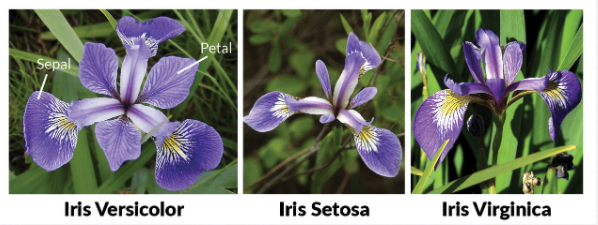

In [38]:
iris_df['Target'].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

This means there are 50 of each type of species.

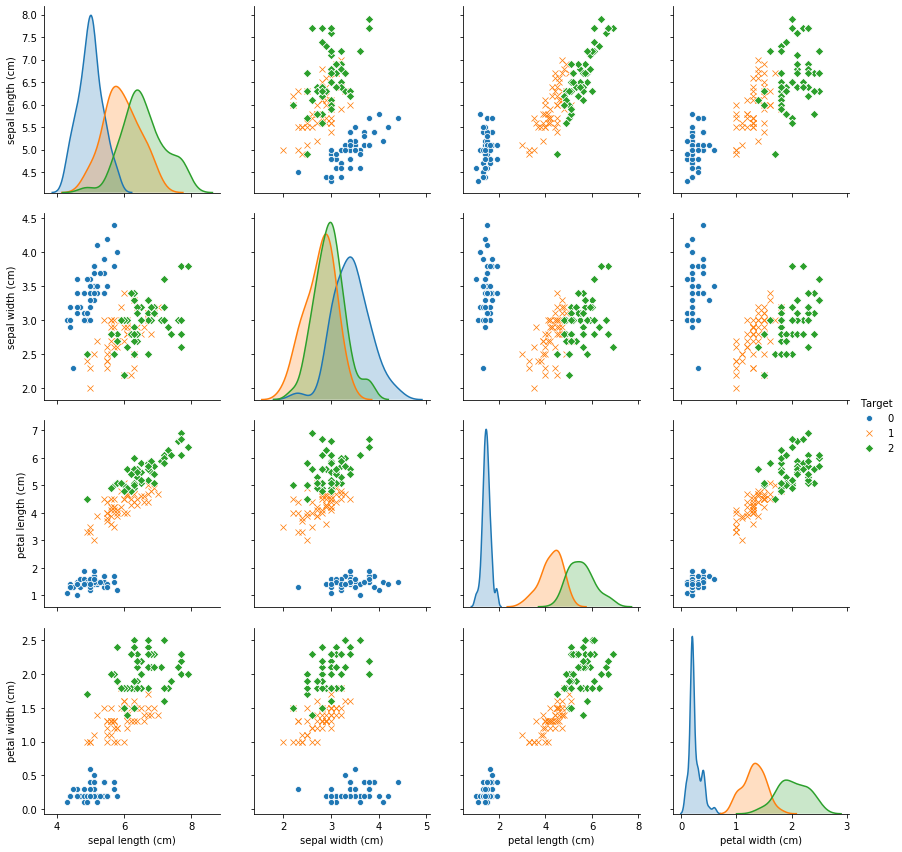

In [48]:
#temp = iris_df.drop('Target', axis =1)
sns.pairplot(iris_df, vars = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
             hue = 'Target', height =3, markers = ['o','x','D'])

###### 4. Apply K means algorithm for finding clusters in data

In [51]:
x= iris_df.iloc[:,[0,1,2,3]].values

In [53]:
from sklearn.cluster import KMeans
wcss = [] #Within Cluster Sum of Squares

Apply the elbow method to see where the WCSS doesn't reduce after every step.

In [55]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter =250)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Plot the results onto a line graph to see the 'elbow'

Text(0, 0.5, 'Value of WCSS')

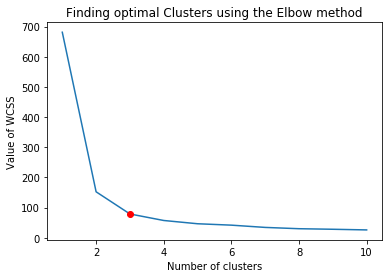

In [58]:
plt.plot(range(1,11), wcss)
plt.plot(3,wcss[2],'ro')
plt.title('Finding optimal Clusters using the Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Value of WCSS')

From the graph we can see that the elbow is formed when the number of clusters are '3'. So we will use 3 as the value of k.

In [62]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter =250)
y_kmeans = kmeans.fit_predict(x)

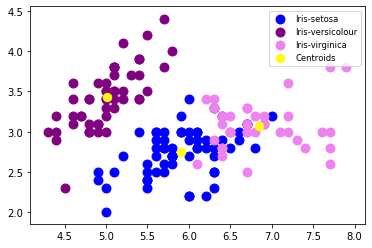

In [78]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 80, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 80, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 80, c = 'violet', label = 'Iris-virginica')

#plot centroids on each of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 70, c = 'yellow', label = 'Centroids')
plt.legend(loc='upper right', fontsize = 'small')

###### The Clusters are as shown above with the centroids in yellow. The optimum number of clusters for this dataset is 3.